In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

https://www.kaggle.com/aljarah/xAPI-Edu-Data/version/6#

Attributes

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

The students are classified into three numerical intervals based on their total grade/mark:
Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.



In [140]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [141]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [142]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


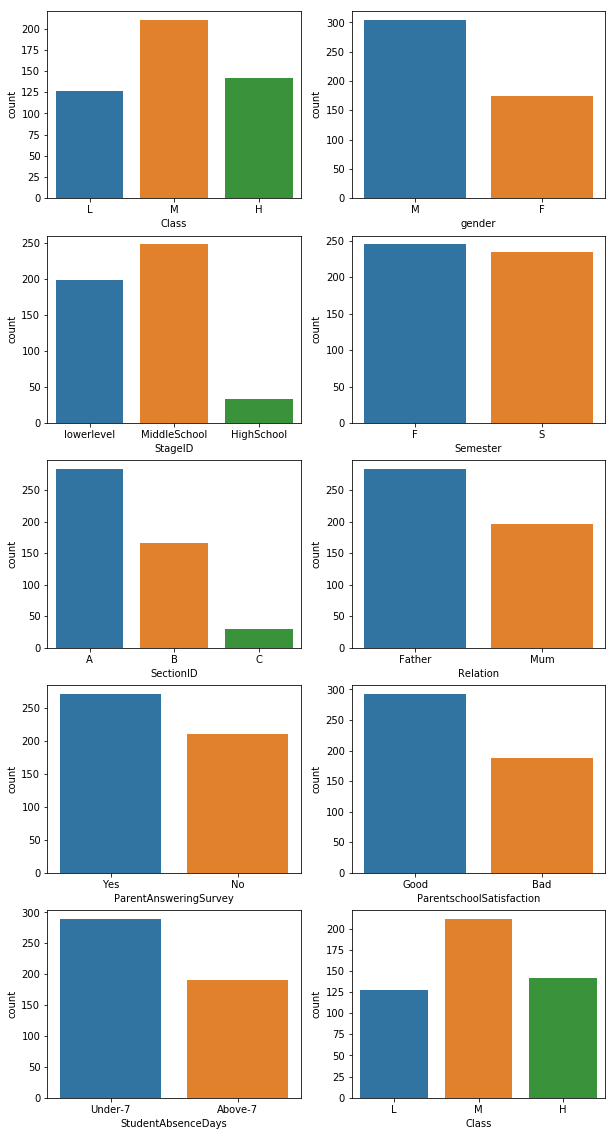

In [144]:
fig, axarr  = plt.subplots(5,2,figsize=(10,20))
ax=sns.countplot(x='Class', data=df, ax=axarr[0,0], order=['L','M','H'])
ax=sns.countplot(x='gender', data=df, ax=axarr[0,1], order=['M','F'])
ax=sns.countplot(x='StageID', data=df, ax=axarr[1,0])
ax=sns.countplot(x='Semester', data=df, ax=axarr[1,1])
ax=sns.countplot(x='SectionID', data=df, ax=axarr[2,0])
ax=sns.countplot(x='Relation', data=df, ax=axarr[2,1])
ax=sns.countplot(x='ParentAnsweringSurvey', data=df, ax=axarr[3,0])
ax=sns.countplot(x='ParentschoolSatisfaction', data=df, ax=axarr[3,1])
ax=sns.countplot(x='StudentAbsenceDays', data=df, ax=axarr[4,0])
ax=sns.countplot(x='Class', data=df, ax=axarr[4,1], order=['L','M','H'])

plt.show()

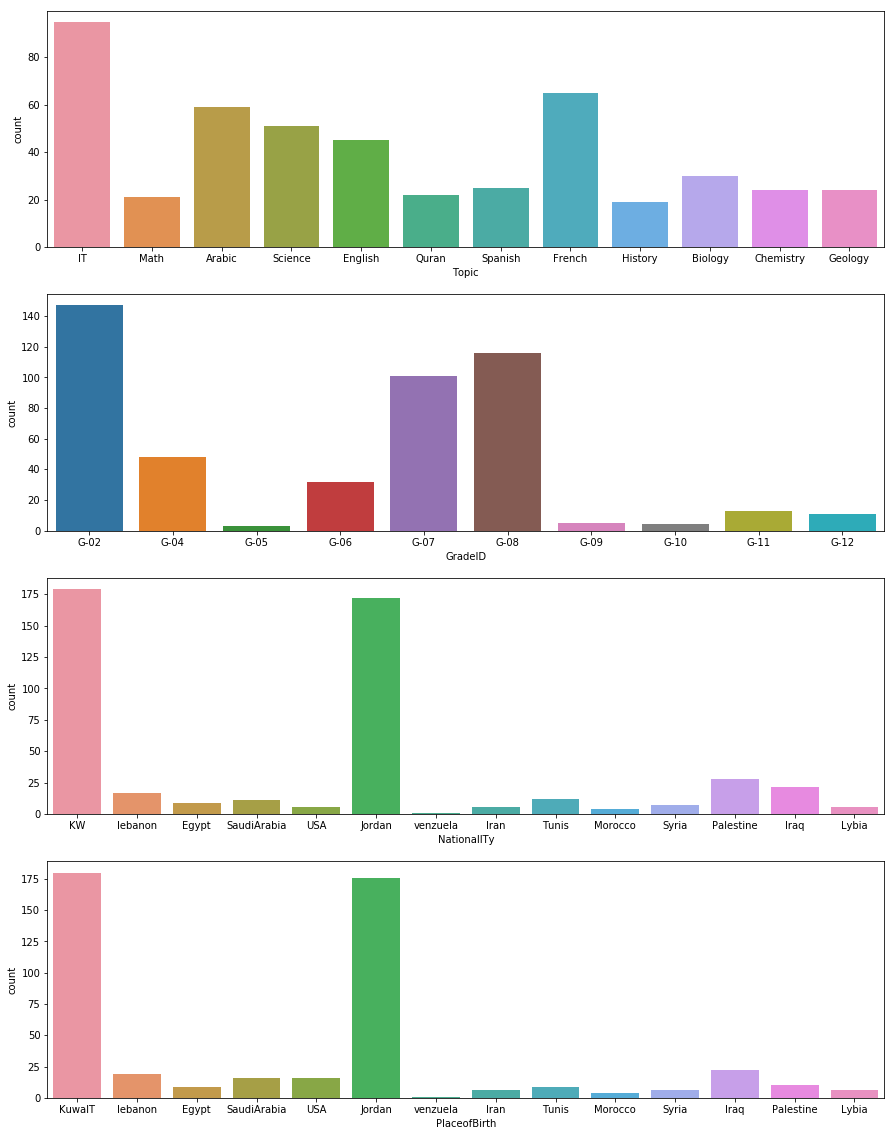

In [145]:
fig, (axis1, axis2, axis3, axis4)  = plt.subplots(4, 1,figsize=(15,20))
ax=sns.countplot(x='Topic', data=df, ax=axis1)
ax=sns.countplot(x='GradeID', data=df, ax=axis2, order=['G-02', 'G-04', 'G-05','G-06','G-07','G-08','G-09','G-10','G-11','G-12'])
ax=sns.countplot(x='NationalITy', data=df, ax=axis3)
ax=sns.countplot(x='PlaceofBirth', data=df, ax=axis4)

plt.show()

In [155]:
def BoxHistOutliers(column, df_focus):
    
    colList = df_focus[column]
    
    # plots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_focus)
    
    plt.subplot(1, 2, 2)
    g=sns.distplot(colList, kde=False, bins=40)
    
    # rotate label for large tick values on histagram x axis
    if (colList.max() > 9999):
        plt.setp(g.get_xticklabels(), rotation=45)

    plt.show()

    # outliers
    Q1, median, Q3 = np.percentile(np.asarray(colList), [25, 50, 75])
    IQR = Q3 - Q1

    loVal = Q1 - 1.5 * IQR
    hiVal = Q3 + 1.5 * IQR

    wiskHi = np.compress(colList <= hiVal, colList)
    wiskLo = np.compress(colList >= loVal, colList)
    
    actualHiVal = np.max(wiskHi)
    actualLoVal = np.min(wiskLo)
    
    outliersHigh = [i for i in colList if i > actualHiVal]
    outliersLow = [i for i in colList if i < actualLoVal]
    
    if (len(outliersHigh) > 0):
        print ('\n'+ column +' Outliers: High')
        display(df_focus.sort_values(by=column, ascending=False)[:len(outliersHigh)])
  
    if (len(outliersLow) > 0):
        print ('\n'+ column +' Outliers: Low')   
        display(df_focus.sort_values(by=column, ascending=False)[:len(outliersLow)])
   

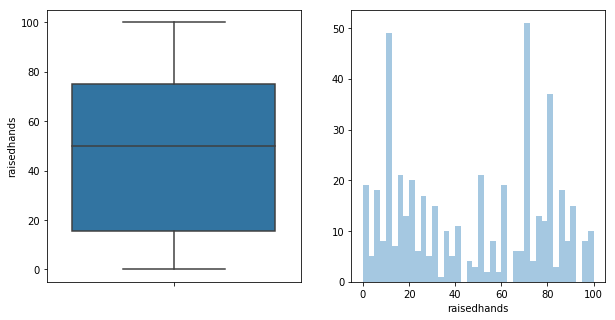

In [156]:
BoxHistOutliers('raisedhands',df)

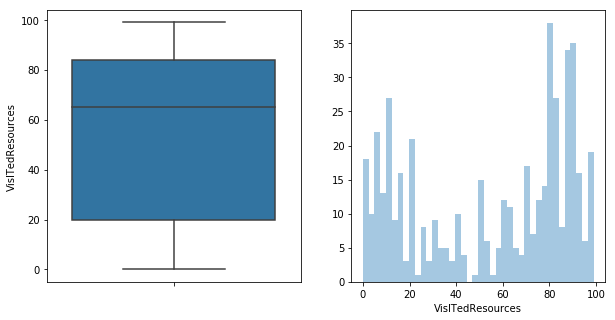

In [157]:
BoxHistOutliers('VisITedResources',df)

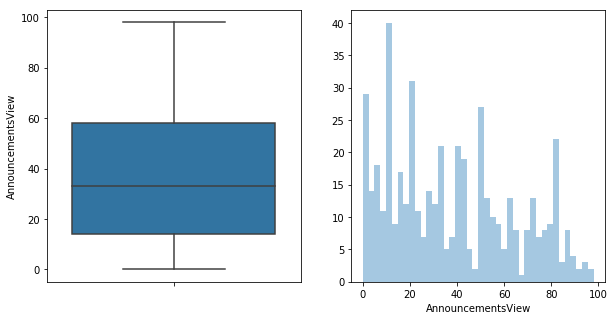

In [158]:
BoxHistOutliers('AnnouncementsView',df)

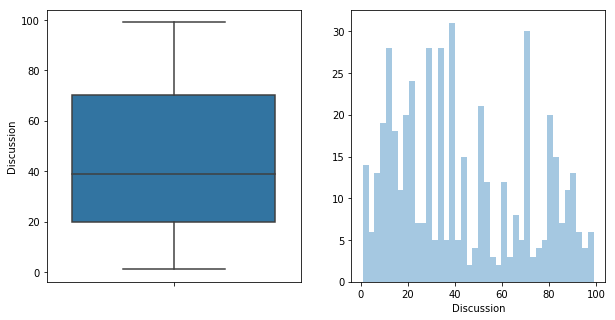

In [159]:
BoxHistOutliers('Discussion',df)

In [160]:
# split continuous and categorical data
df_cat = pd.DataFrame()
df_cont = pd.DataFrame()

for col in df.columns:
    if isinstance(df[col][0], np.int64):
        df_cont[col]=df[col]
    else:
        df_cat[col]=df[col]

In [148]:
catCol = 'Class'
vals = df[catCol].unique()
vals = vals.tolist()
lastval = vals[len(vals)-1]

for val1 in vals:
    for val2 in vals:
        if val1 != val2:
            print (catCol,':', val1, 'vs', val2)
            for col in df_cont.loc[:].columns:
                print(col)
                print(stats.ttest_ind(
                df[df[catCol] == val1][col],
                df[df[catCol] == val2][col]
                ))
        if val2 is lastval:
            vals.remove(val1)

Class : M vs L
raisedhands
Ttest_indResult(statistic=12.025417467607058, pvalue=6.0257961950166322e-28)
VisITedResources
Ttest_indResult(statistic=14.937530742151987, pvalue=4.7740046474436641e-39)
AnnouncementsView
Ttest_indResult(statistic=10.649367269804781, pvalue=5.1867499063206687e-23)
Discussion
Ttest_indResult(statistic=4.4428037620785599, pvalue=1.2070489787766579e-05)
Class : M vs H
raisedhands
Ttest_indResult(statistic=-7.7942725716881043, pvalue=7.4259600437326172e-14)
VisITedResources
Ttest_indResult(statistic=-6.6621304357067901, pvalue=1.0451677991890979e-10)
AnnouncementsView
Ttest_indResult(statistic=-4.6734507648560255, pvalue=4.2281492031435908e-06)
Discussion
Ttest_indResult(statistic=-3.4241151190523058, pvalue=0.00068976437729300504)
Class : H vs L
raisedhands
Ttest_indResult(statistic=21.642015605428497, pvalue=1.1104394204528078e-60)
VisITedResources
Ttest_indResult(statistic=25.665194746420461, pvalue=4.7517211119760376e-74)
AnnouncementsView
Ttest_indResult(st

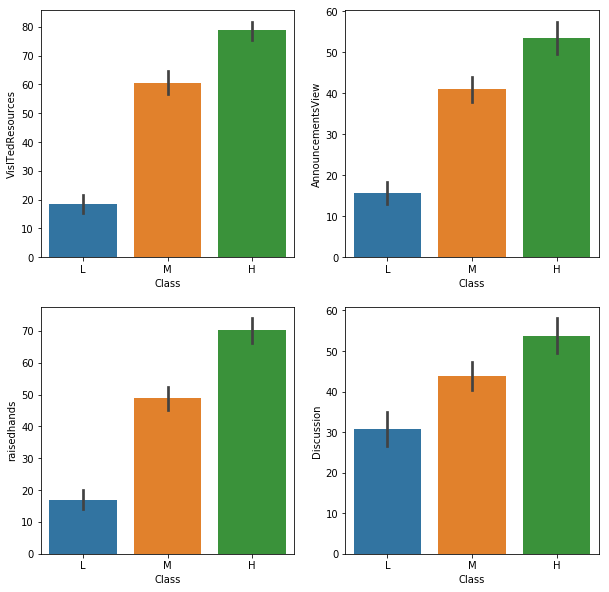

In [149]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
ax=sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
ax=sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
ax=sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
ax=sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

plt.show()

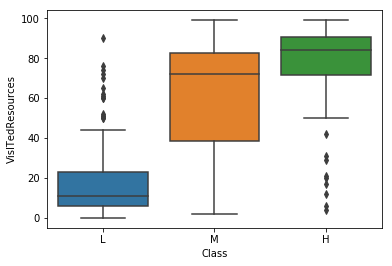

In [152]:
ax = sns.boxplot(x="Class", y="VisITedResources", data=df, order=['L','M','H'])
plt.show()

In [180]:
# outliers

workList=df['VisITedResources'][df['Class'] == 'L']
df_focus=df[df['Class'] == 'L']
column='VisITedResources'

Q1, median, Q3 = np.percentile(workList, [25, 50, 75])
IQR = Q3 - Q1

loVal = Q1 - 1.5 * IQR
hiVal = Q3 + 1.5 * IQR

wiskHi = np.compress(workList <= hiVal, workList)
wiskLo = np.compress(workList >= loVal, workList)
    
actualHiVal = np.max(wiskHi)
actualLoVal = np.min(wiskLo)
    
outliersHigh = [i for i in workList if i > actualHiVal]
outliersLow = [i for i in workList if i < actualLoVal]
    
if (len(outliersHigh) > 0):
    print ('\n'+ column +' Outliers: High')
    display(df_focus.sort_values(by=column, ascending=False)[:len(outliersHigh)])
  
if (len(outliersLow) > 0):
    print ('\n'+ column +' Outliers: Low')   
    display(df_focus.sort_values(by=column, ascending=False)[:len(outliersLow)])


VisITedResources Outliers: High


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
129,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70,90,2,2,Yes,Good,Under-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L
251,M,Egypt,Egypt,lowerlevel,G-04,A,English,S,Mum,19,74,32,17,No,Good,Above-7,L
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
87,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,19,70,3,50,No,Bad,Under-7,L
141,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,S,Father,19,65,50,10,No,Bad,Above-7,L
181,M,Jordan,Jordan,lowerlevel,G-02,B,French,S,Father,50,62,13,33,No,Bad,Above-7,L
213,M,Tunis,Tunis,MiddleSchool,G-08,C,Spanish,S,Father,7,61,22,14,No,Bad,Above-7,L
133,M,KW,KuwaIT,lowerlevel,G-02,A,IT,S,Father,12,60,0,70,Yes,Good,Above-7,L
140,M,Tunis,Tunis,MiddleSchool,G-07,A,Quran,F,Father,10,60,5,20,Yes,Bad,Above-7,L


In [181]:
# outliers

workList=df['VisITedResources'][df['Class'] == 'H']
df_focus=df[df['Class'] == 'H']
column='VisITedResources'

Q1, median, Q3 = np.percentile(workList, [25, 50, 75])
IQR = Q3 - Q1

loVal = Q1 - 1.5 * IQR
hiVal = Q3 + 1.5 * IQR

wiskHi = np.compress(workList <= hiVal, workList)
wiskLo = np.compress(workList >= loVal, workList)
    
actualHiVal = np.max(wiskHi)
actualLoVal = np.min(wiskLo)
    
outliersHigh = [i for i in workList if i > actualHiVal]
outliersLow = [i for i in workList if i < actualLoVal]
    
if (len(outliersHigh) > 0):
    print ('\n'+ column +' Outliers: High')
    display(df_focus.sort_values(by=column, ascending=False)[:len(outliersHigh)])
  
if (len(outliersLow) > 0):
    print ('\n'+ column +' Outliers: Low')   
    display(df_focus.sort_values(by=column, ascending=False)[:len(outliersLow)])


VisITedResources Outliers: Low


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
464,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,85,99,42,90,Yes,Good,Under-7,H
354,M,Jordan,Jordan,lowerlevel,G-02,B,French,F,Mum,30,98,42,21,Yes,Good,Under-7,H
395,M,Jordan,Palestine,MiddleSchool,G-07,A,Biology,S,Mum,70,98,54,72,Yes,Good,Under-7,H
358,F,lebanon,lebanon,lowerlevel,G-02,B,French,F,Mum,72,98,52,15,Yes,Good,Under-7,H
362,M,Palestine,Jordan,lowerlevel,G-02,A,Arabic,F,Father,90,98,41,38,Yes,Good,Under-7,H
392,F,Iraq,Iraq,MiddleSchool,G-07,A,Biology,F,Mum,86,98,50,20,Yes,Good,Under-7,H
451,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,19,98,20,2,Yes,Good,Under-7,H
450,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,15,97,22,10,Yes,Good,Under-7,H
318,F,Jordan,Jordan,lowerlevel,G-02,A,French,F,Mum,60,97,13,3,Yes,Good,Under-7,H


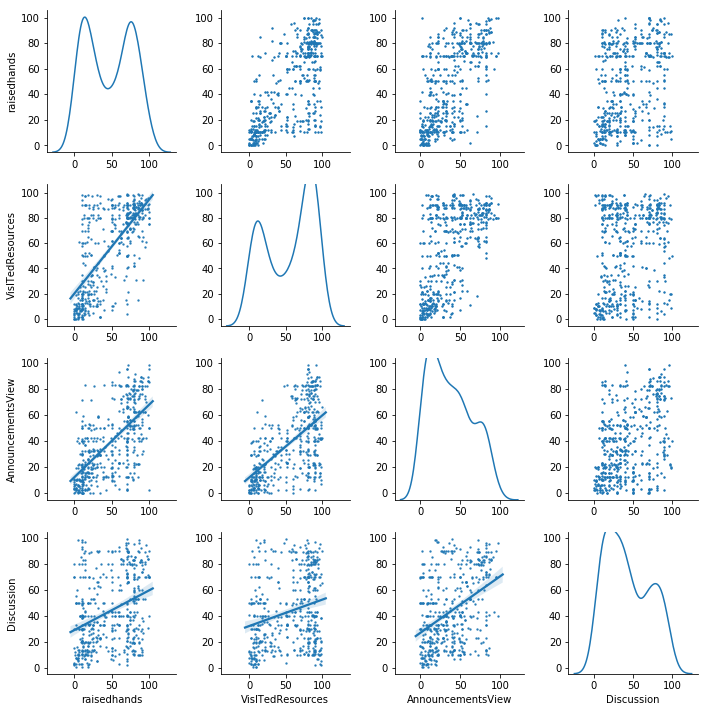

In [123]:
g = sns.PairGrid(df_cont)
# Scatterplot.
g.map_upper(plt.scatter, s=2)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws={'s':2})
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot)
plt.show()

In [124]:
# Make the correlation matrix.
corrmat = df_cont.corr()
print(corrmat)

                   raisedhands  VisITedResources  AnnouncementsView  \
raisedhands           1.000000          0.691572           0.643918   
VisITedResources      0.691572          1.000000           0.594500   
AnnouncementsView     0.643918          0.594500           1.000000   
Discussion            0.339386          0.243292           0.417290   

                   Discussion  
raisedhands          0.339386  
VisITedResources     0.243292  
AnnouncementsView    0.417290  
Discussion           1.000000  


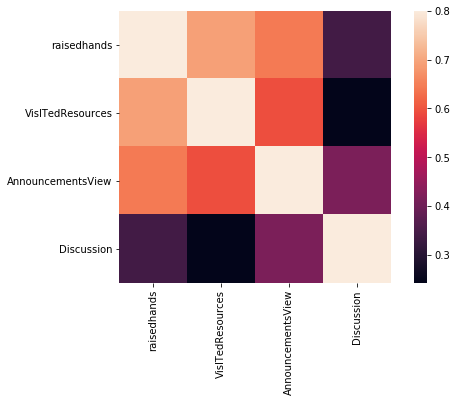

In [125]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(8, 5))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [126]:
df_cat_dumm = pd.get_dummies(df_cat)

In [127]:
corrmat = df_cat_dumm.corr()
print(corrmat)

                               gender_F  gender_M  NationalITy_Egypt  \
gender_F                       1.000000 -1.000000          -0.040886   
gender_M                      -1.000000  1.000000           0.040886   
NationalITy_Egypt             -0.040886  0.040886           1.000000   
NationalITy_Iran              -0.046264  0.046264          -0.015552   
NationalITy_Iraq              -0.041827  0.041827          -0.030296   
NationalITy_Jordan             0.147061 -0.147061          -0.103300   
NationalITy_KW                -0.100790  0.100790          -0.106599   
NationalITy_Lybia             -0.007305  0.007305          -0.015552   
NationalITy_Morocco           -0.021823  0.021823          -0.012672   
NationalITy_Palestine         -0.040784  0.040784          -0.034405   
NationalITy_SaudiArabia       -0.000301  0.000301          -0.021170   
NationalITy_Syria             -0.019934  0.019934          -0.016816   
NationalITy_Tunis             -0.093569  0.093569          -0.02

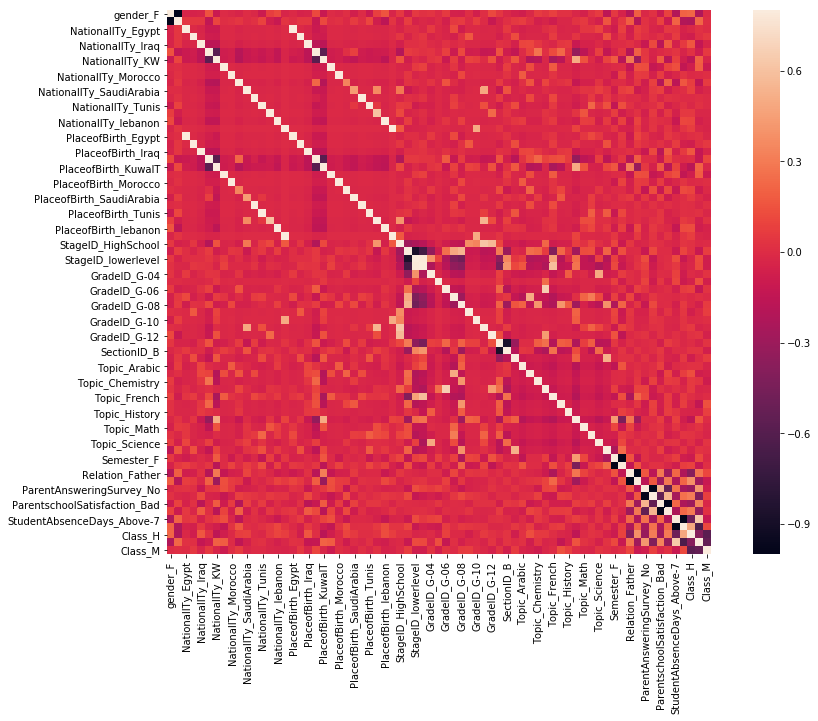

In [130]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [182]:
# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

(150, 4)


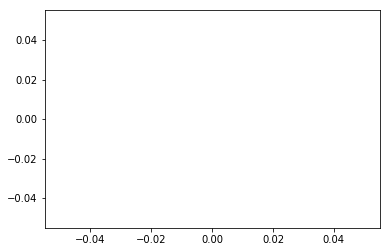

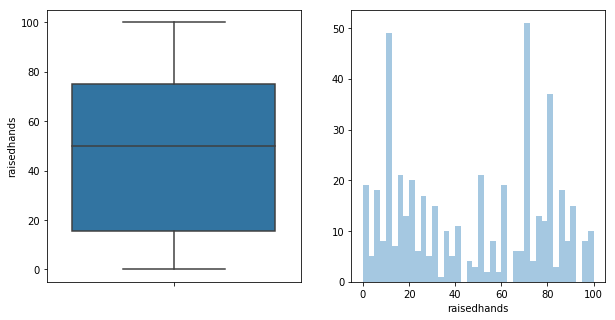

In [201]:
BoxHistOutliers('raisedhands',df)

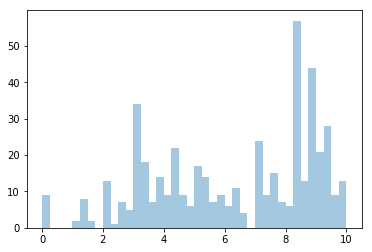

In [227]:
import math
#df_float = map(float, df['raisedhands'])
#[float(i) for i in lst]
df_float = [float(i) for i in df['raisedhands']]
df_sqrt = [math.sqrt(i) for i in df_float]

g=sns.distplot(df_sqrt, kde=False, bins=40)
plt.show()

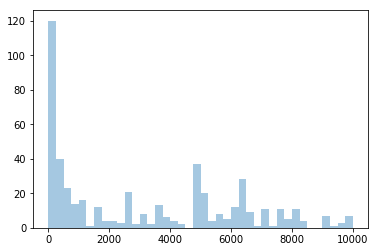

In [232]:
#log10
df_float = [float(i) for i in df['raisedhands']]
df_pwr2 = [i**2 for i in df_float]

g=sns.distplot(df_pwr2, kde=False, bins=40)
plt.show()

In [190]:
 #StandardScaler().fit_transform(X))
    # temp = temp.reshape(-1,1)
df_reshape=df['raisedhands'].reshape(-1,1)
ss_raisedhands = StandardScaler().fit_transform(df_reshape)

/Users/christophersmyth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christophersmyth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


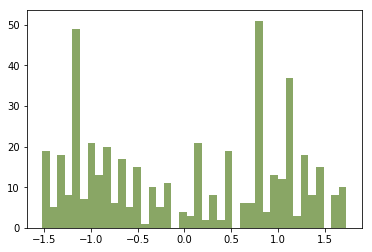

In [192]:
g=sns.distplot(ss_raisedhands, kde=False, bins=40)
plt.show()

In [200]:
#log_data = np.log(data)
log_data = np.log(df['raisedhands'])
log_data.dropna()
g=sns.distplot(log_data, bins=40)

/Users/christophersmyth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


ValueError: range parameter must be finite.

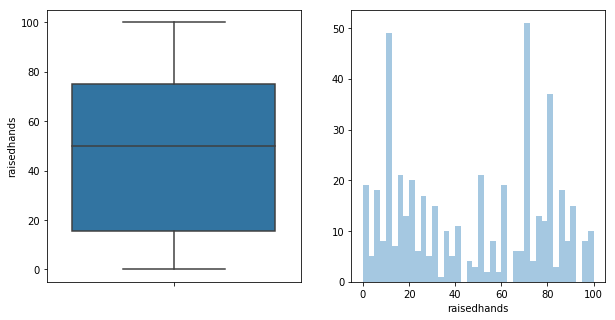

In [194]:
BoxHistOutliers('raisedhands',df)